In [1]:
import sys, os
sys.path.append('/Users/michaelgentnermac/Documents/ADL4CV/video_interpolation/')
import torch
import torch.nn as nn
from backprojection.bfgs import BFGSProjector
from interpolate_latent.functions import *
from models.wgan import Generator, Discriminator
import torchvision.transforms as transforms
import pickle
import numpy as np
import matplotlib.pyplot as plt
from backprojection.criticprojector import CriticProjector

netG = torch.load('/Users/michaelgentnermac/Documents/ADL4CV/final_models/wgan/g.pt',map_location=torch.device('cpu'))
netG = netG.double().cpu()
netD = torch.load('/Users/michaelgentnermac/Documents/ADL4CV/final_models/wgan/d.pt', map_location=torch.device('cpu'))
netD = netD.double().cpu()

netG = netG.eval()
netD = netD.eval()

In [12]:
def create_folder(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [15]:
z_samples = torch.randn((64, 16)).double()
toPil = transforms.ToPILImage()

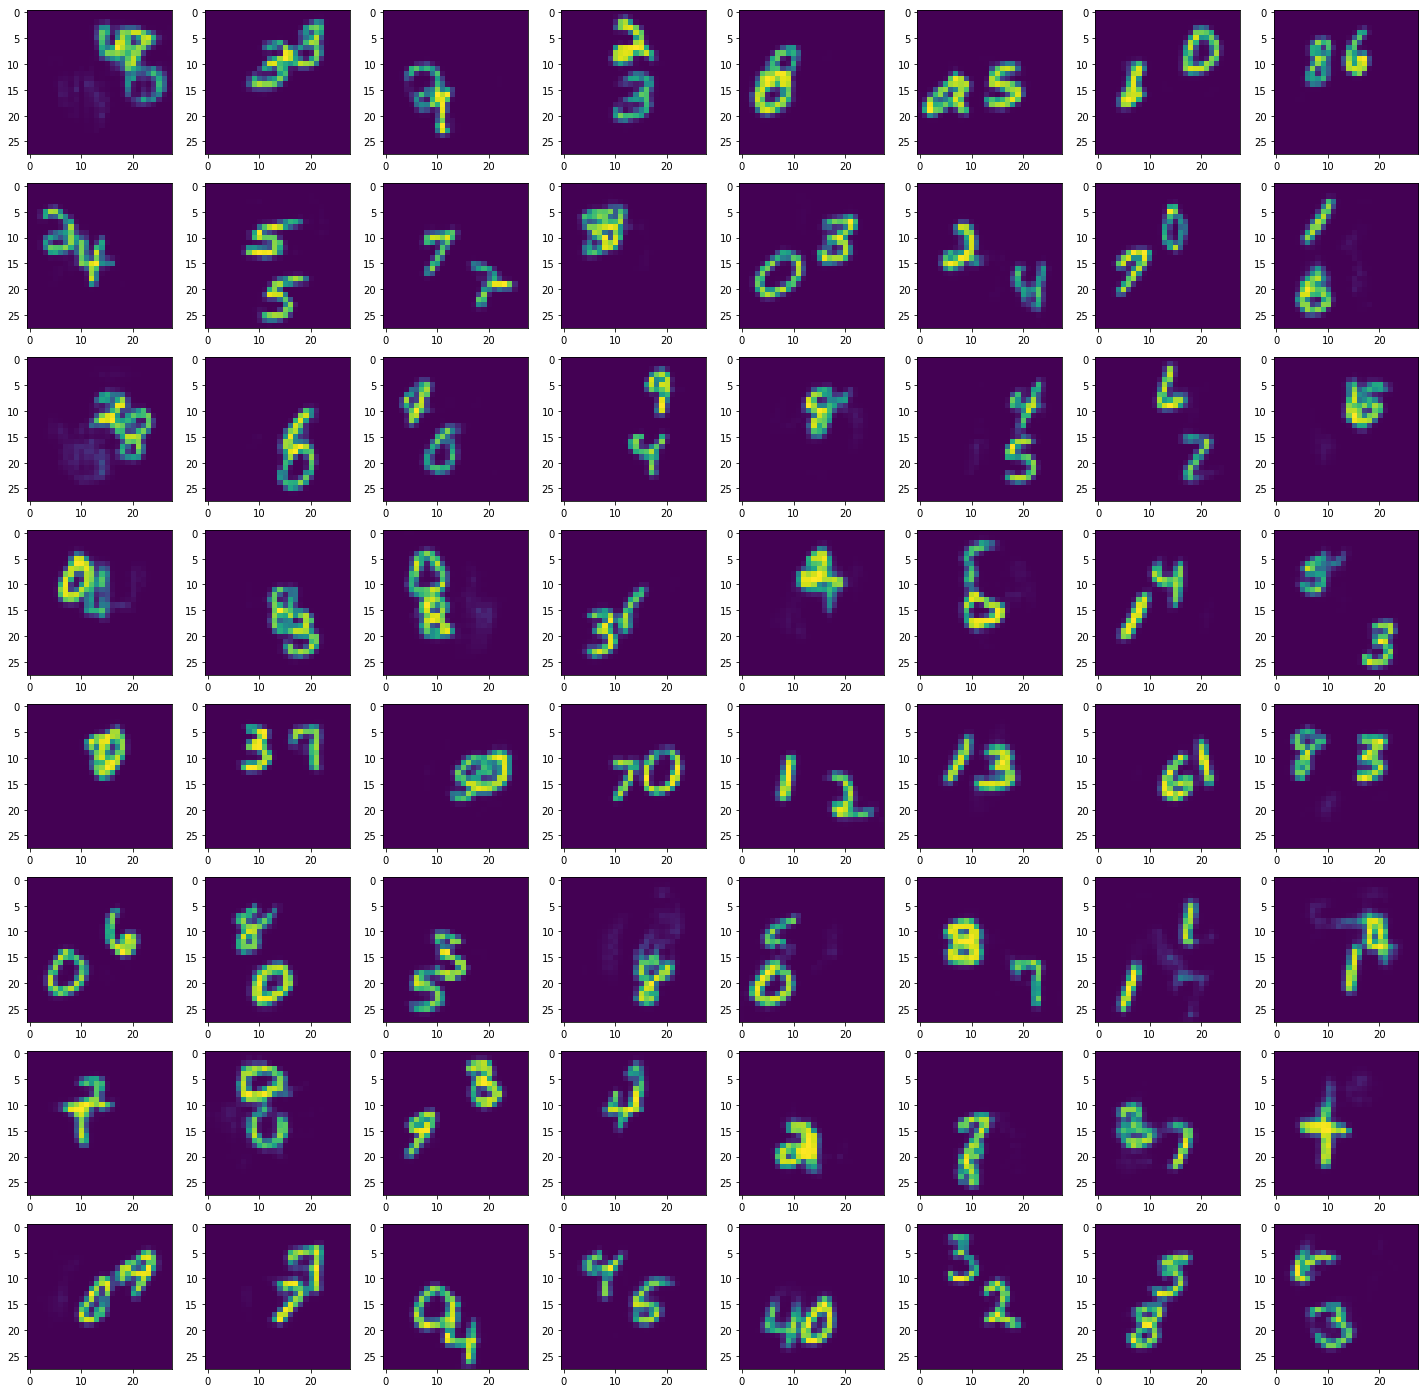

In [11]:
latent_vectors = []
fig=plt.figure(figsize=(25,25))
columns = 8
rows = 8
pred = netG(z_samples).squeeze().detach().numpy()

for i in range(columns*rows):
    
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(pred[i, :, :])
plt.show()

In [17]:
path = '/Users/michaelgentnermac/Documents/ADL4CV/results/latent_space_sampling/'
create_folder(path)
for i in range(pred.shape[0]):
    
    toPil(torch.tensor(pred[i, :, :]).float()).save(os.path.join(path, str(i)+'.png'), 'PNG')